# Challenge 5

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from mlxtend.plotting import plot_decision_regions

   Unnamed: 0  Class  Feature 0  Feature 1
0           0      1   1.471631   1.928730
1           1      1   2.372546   2.596818
2           2      1   0.031603   0.596687
3           3      1  -0.309074   0.948616
4           4      1   0.217916   0.398090


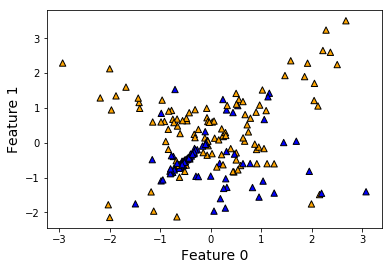

In [69]:
student_identity = 'ramachandran.swati'

filenameToRead = '5challenge_training_' + student_identity + '.csv'
training_df = pd.read_csv('../../../Challenges/5Files/' + filenameToRead)

print(training_df.head())

X1 = training_df[['Feature 0', 'Feature 1']].values
Y1 = training_df[['Class']].values

color = ['blue' if l == 0 else 'orange' for l in Y1]
plt.scatter(X1[:, 0], X1[:, 1], marker='^', c=color,
            s=40, edgecolor='k')
plt.xlabel('Feature 0', fontsize=14)
plt.ylabel('Feature 1', fontsize=14)
plt.show()

In [70]:
df = training_df.copy()
print(df.shape)

(200, 4)


In [71]:
X = X1
y = Y1.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

## Grid search

In [72]:
pipe = Pipeline([
    ('clf', SVC())
])

param_grid = [
    {
        'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'clf__C': [1.0,10,20,40]
    }]

In [73]:
grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=param_grid, verbose=5, scoring='accuracy')

In [74]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] clf__C=1.0, clf__kernel=linear ..................................
[CV]  clf__C=1.0, clf__kernel=linear, score=0.7777777777777778, total=   0.0s
[CV] clf__C=1.0, clf__kernel=linear ..................................
[CV]  clf__C=1.0, clf__kernel=linear, score=0.7037037037037037, total=   0.0s
[CV] clf__C=1.0, clf__kernel=linear ..................................
[CV]  clf__C=1.0, clf__kernel=linear, score=0.7692307692307693, total=   0.0s
[CV] clf__C=1.0, clf__kernel=poly ....................................
[CV]  clf__C=1.0, clf__kernel=poly, score=0.5555555555555556, total=   0.0s
[CV] clf__C=1.0, clf__kernel=poly ....................................
[CV]  clf__C=1.0, clf__kernel=poly, score=0.5370370370370371, total=   0.0s
[CV] clf__C=1.0, clf__kernel=poly ....................................
[CV]  clf__C=1.0, clf__kernel=poly, score=0.5576923076923077, total=   0.0s
[CV] clf__C=1.0, clf__kernel=rbf ..................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV]  clf__C=40, clf__kernel=poly, score=0.5576923076923077, total=   0.0s
[CV] clf__C=40, clf__kernel=rbf ......................................
[CV]  clf__C=40, clf__kernel=rbf, score=0.7777777777777778, total=   0.0s
[CV] clf__C=40, clf__kernel=rbf ......................................
[CV]  clf__C=40, clf__kernel=rbf, score=0.7222222222222222, total=   0.0s
[CV] clf__C=40, clf__kernel=rbf ......................................
[CV]  clf__C=40, clf__kernel=rbf, score=0.7884615384615384, total=   0.0s
[CV] clf__C=40, clf__kernel=sigmoid ..................................
[CV] ........ clf__C=40, clf__kernel=sigmoid, score=0.5, total=   0.0s
[CV] clf__C=40, clf__kernel=sigmoid ..................................
[CV]  clf__C=40, clf__kernel=sigmoid, score=0.6666666666666666, total=   0.0s
[CV] clf__C=40, clf__kernel=sigmoid ..................................
[CV]  clf__C=40, clf__kernel=sigmoid, score=0.40384615384615385, total=   0.0s


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'clf__C': [1.0, 10, 20, 40]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=5)

In [75]:
grid.best_params_

{'clf__C': 10, 'clf__kernel': 'rbf'}

### Using parameters from best model

In [76]:
clf = SVC(kernel='rbf', C=20)  
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test) 
print(accuracy_score(y_test, y_pred))

0.925


Text(0.5,1,'SVM Decision Region Boundary')

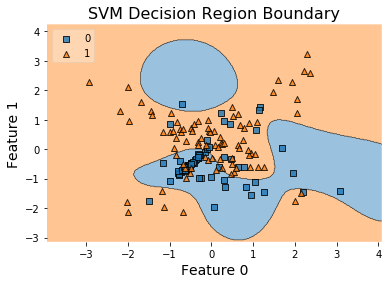

In [77]:
plot_decision_regions(X=X_train, 
                      y=y_train,
                      clf=clf, 
                      legend=2)
plt.xlabel('Feature 0', size=14)
plt.ylabel('Feature 1', size=14)
plt.title('SVM Decision Region Boundary', size=16)

### Going to plot multiple kernels to see how they are visualised

In [78]:
def clf_plot(kernel_name='linear'):
    clf = SVC(kernel=kernel_name, C=20)  
    clf.fit(X_train, y_train) 
    y_pred = clf.predict(X_test) 
    acc = accuracy_score(y_test, y_pred)
    plot_decision_regions(X=X_train, 
                      y=y_train,
                      clf=clf, 
                      legend=2)
    plt.xlabel('Feature 0', size=14)
    plt.ylabel('Feature 1', size=14)
    plt.title('SVM Decision Region Boundary for '+(kernel_name)+' Accuracy = '+str(acc), size=16)

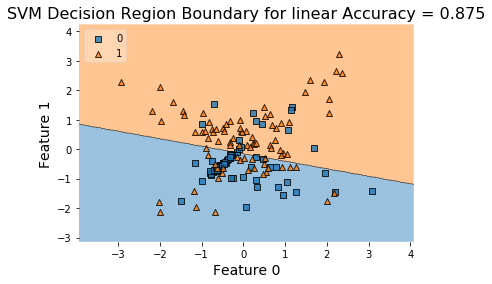

In [79]:
clf_plot('linear')

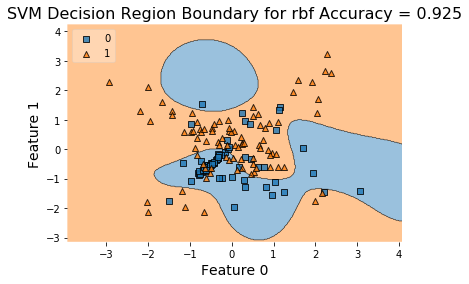

In [80]:
clf_plot('rbf')

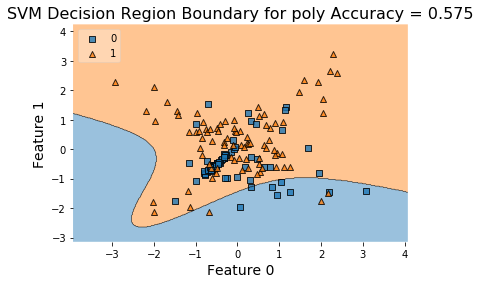

In [81]:
clf_plot('poly')

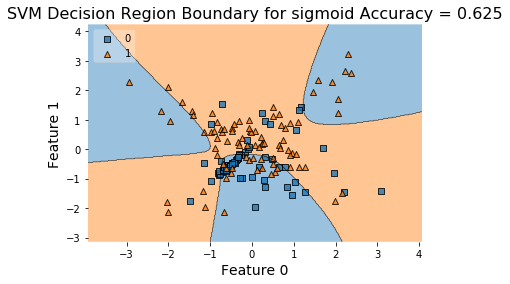

In [82]:
clf_plot('sigmoid')

## Using full train and test data

In [83]:
df_test = pd.read_csv('../../../Challenges/5Files/5challenge_testing_ramachandran.swati.csv')
df_test.head(5)

,Unnamed: 0,Class,Feature 0,Feature 1
0,0,NaN,-1.824244,-1.366356
1,1,NaN,0.528775,1.430922
2,2,NaN,-0.097388,-0.076037
3,3,NaN,-0.583928,-0.575867
4,4,NaN,0.388514,-1.877510


In [84]:
# get test features
X_test = df_test[['Feature 0', 'Feature 1']].values

In [85]:
clf = SVC(kernel='rbf', C=20)  
clf.fit(X, y) 
y_pred = clf.predict(X_test) 

In [86]:
df_test['Class'] = y_pred

In [87]:
df_test = df_test.drop(['Unnamed: 0'], axis=1)

In [88]:
df_test.head(5)

,Class,Feature 0,Feature 1
0,1,-1.824244,-1.366356
1,1,0.528775,1.430922
2,1,-0.097388,-0.076037
3,0,-0.583928,-0.575867
4,0,0.388514,-1.877510


In [89]:
df_test.to_csv('5challenge_testing_ramachandran.swati.csv', index=False)

Text(0.5,1,'SVM Decision Region Boundary for RBF kernel')

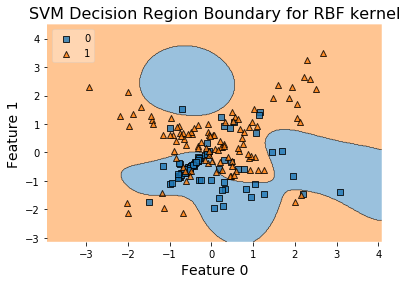

In [90]:
# plot final boundaries for the entire training set
plot_decision_regions(X=X, 
                      y=y,
                      clf=clf, 
                      legend=2)
plt.xlabel('Feature 0', size=14)
plt.ylabel('Feature 1', size=14)
plt.title('SVM Decision Region Boundary for RBF kernel', size=16)